In [ ]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10

results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [ ]:
a={}
a['ate']=1

In [ ]:
a

{'ate': 1}

In [ ]:
type(a['ate'])

int

In [ ]:
type(a.get('ate'))

int

In [ ]:
import string

samples = ['The cat sat on the mat.','The dog ate my homework.']
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [ ]:
import string

string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [ ]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

9개의 고유한 토큰을 찾았습니다.


In [ ]:
tokenizer.texts_to_sequences(samples)

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [ ]:
tokenizer.texts_to_matrix(samples, mode='binary')

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
tokenizer.word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [ ]:
tokenizer.texts_to_matrix(samples, mode='tfidf')

array([[0.        , 0.86490296, 0.69314718, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.51082562, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
samples = ['The cat sat on the mat.','The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [ ]:
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)

In [ ]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6727 - acc: 0.6135 - val_loss: 0.6284 - val_acc: 0.6904
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5505 - acc: 0.7460 - val_loss: 0.5318 - val_acc: 0.7264
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4656 - acc: 0.7854 - val_loss: 0.5039 - va

# 원본 텍스트에서 임베딩까지

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/aclImdb.zip'

-rw------- 1 root root 60711700 Nov  5 14:13 '/content/drive/My Drive/Colab Notebooks/datasets/aclImdb.zip'


In [5]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/aclImdb.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: __MACOSX/aclImdb/train/pos/._7754_9.txt  
  inflating: aclImdb/train/pos/7755_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: aclImdb/train/pos/7756_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: aclImdb/train/pos/7757_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: aclImdb/train/pos/7758_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: aclImdb/train/pos/7759_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: aclImdb/train/pos/775_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: aclImdb/train/pos/7760_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7760_10.txt  
  inflating: aclImdb/train/pos/7761_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7761_10.txt  
  inflating: aclImdb/train/pos/7762_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7762_8.txt  
  inflating:

In [6]:
!ls -l

total 16
drwxr-xr-x 4 root root 4096 Nov 18  2017 aclImdb
drwx------ 5 root root 4096 Nov  6 15:27 drive
drwxrwxr-x 3 root root 4096 Nov 18  2017 __MACOSX
drwxr-xr-x 1 root root 4096 Nov  1 13:35 sample_data


In [7]:
import os
train_dir = '/content/aclImdb/train'

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type =='neg':
                labels.append(0)
            else:
                labels.append(1)

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기;', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기; (25000,)


# GloVe

In [9]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/datasets/GloVe.zip

-rw------- 1 root root 862182613 Sep 15 01:08 '/content/drive/My Drive/Colab Notebooks/datasets/GloVe.zip'


In [10]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/GloVe.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/GloVe.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [11]:
import numpy as np
import os

glove_dir = '.'

embeddings_index={}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [21]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embeddings_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [22]:
word_index.items()

dict_items([('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6), ('br', 7), ('in', 8), ('it', 9), ('i', 10), ('this', 11), ('that', 12), ('was', 13), ('as', 14), ('for', 15), ('with', 16), ('movie', 17), ('but', 18), ('film', 19), ('on', 20), ('not', 21), ('you', 22), ('are', 23), ('his', 24), ('have', 25), ('he', 26), ('be', 27), ('one', 28), ('all', 29), ('at', 30), ('by', 31), ('an', 32), ('they', 33), ('who', 34), ('so', 35), ('from', 36), ('like', 37), ('her', 38), ('or', 39), ('just', 40), ('about', 41), ("it's", 42), ('out', 43), ('if', 44), ('has', 45), ('some', 46), ('there', 47), ('what', 48), ('good', 49), ('more', 50), ('when', 51), ('very', 52), ('up', 53), ('no', 54), ('time', 55), ('she', 56), ('even', 57), ('my', 58), ('would', 59), ('which', 60), ('only', 61), ('story', 62), ('really', 63), ('see', 64), ('their', 65), ('had', 66), ('can', 67), ('were', 68), ('me', 69), ('well', 70), ('than', 71), ('we', 72), ('much', 73), ('been', 74), ('bad', 75), ('get'

In [23]:
embeddings_index['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [27]:
model.layers[0]

In [28]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_traind_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 4s 132ms/step - loss: 2.5015 - acc: 0.4850 - val_loss: 0.9716 - val_acc: 0.4960
Epoch 2/10
7/7 [==============================] - 1s 104ms/step - loss: 0.4645 - acc: 0.7750 - val_loss: 1.2366 - val_acc: 0.4957
Epoch 3/10
7/7 [==============================] - 1s 108ms/step - loss: 0.3264 - acc: 0.9250 - val_loss: 1.0484 - val_acc: 0.4989
Epoch 4/10
7/7 [==============================] - 1s 111ms/step - loss: 0.4126 - acc: 0.7700 - val_loss: 0.8973 - val_acc: 0.5132
Epoch 5/10
7/7 [==============================] - 1s 100ms/step - loss: 0.1896 - acc: 0.9550 - val_loss: 0.7220 - val_acc: 0.5588
Epoch 6/10
7/7 [==============================] - 1s 102ms/step - loss: 0.1309 - acc: 0.9850 - val_loss: 0.7366 - val_acc: 0.5585
Epoch 7/10
7/7 [==============================] - 1s 110ms/step - loss: 0.0996 - acc: 0.9950 - val_loss: 1.6630 - val_acc: 0.5007
Epoch 8/10
7/7 [==============================] - 1s 110ms/step - loss: 0.2002 - acc: 0.93

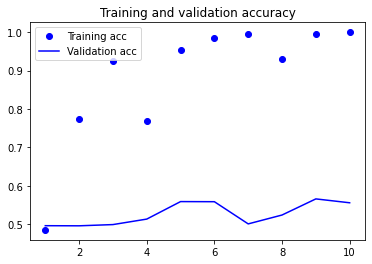

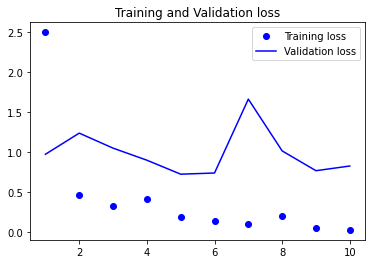

In [29]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# 사전 훈련된 임베딩 사용하지 않음

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 135ms/step - loss: 0.6920 - acc: 0.5300 - val_loss: 0.7023 - val_acc: 0.5018
Epoch 2/10
7/7 [==============================] - 1s 114ms/step - loss: 0.4929 - acc: 0.9500 - val_loss: 0.6983 

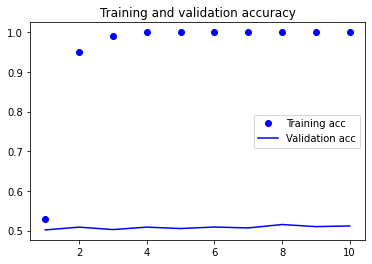

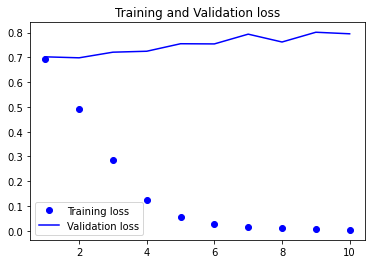

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# test

In [32]:
!ls -l

total 2202348
drwxr-xr-x 4 root root       4096 Nov 18  2017 aclImdb
drwx------ 5 root root       4096 Nov  6 15:27 drive
-rw-rw-r-- 1 root root  347116733 Aug  4  2014 glove.6B.100d.txt
-rw-rw-r-- 1 root root  693432828 Aug  4  2014 glove.6B.200d.txt
-rw-rw-r-- 1 root root 1037962819 Aug 27  2014 glove.6B.300d.txt
-rw-rw-r-- 1 root root  171350079 Aug  4  2014 glove.6B.50d.txt
drwxrwxr-x 3 root root       4096 Nov 18  2017 __MACOSX
-rw-r--r-- 1 root root    5296488 Nov  6 15:45 pre_traind_glove_model.h5
drwxr-xr-x 1 root root       4096 Nov  1 13:35 sample_data


In [34]:
test_dir = '/content/aclImdb/test'

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type =='neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test=pad_sequences(sequences, maxlen=maxlen)
y_test=np.asarray(labels)

In [35]:
tokenizer.texts_to_sequences(texts)

Output hidden; open in https://colab.research.google.com to view.

In [38]:
model.load_weights('/content/pre_traind_glove_model.h5')

In [39]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.8241 - acc: 0.5535


[0.8241181969642639, 0.5534800291061401]